In [1]:
import numpy as np #lib para cálculos e funções em arrays multidimensionais
import pandas as pd #pandas - libpra manipulação e análise de dados de alta performance
import seaborn as sb #lib pra dar um upgrade na visualização do matplotlib
import matplotlib #lib para plotar gráficos
import matplotlib.pyplot as plt
sb.set_style('darkgrid') #definindo tema do seaborn (fundo mais escuro com grelhas)

font = {'family' : 'Arial', #definindo objeto para formatar a fonte
        'size'   : 16}

matplotlib.rc('font', **font) #aplicando a fonte padrão que queremos para o plot dos gráficos

## 1 - Carregando os Dataset ##

In [2]:
cor_idade_temp = pd.read_csv('cor-idade-suspeitos-2020.csv', sep=';', encoding = "ISO-8859-1",skiprows=[0,1,2,3,12,13,14,15])

display(cor_idade_temp)

,Cor,0-4a,5-9a,10-14a,15-19a,20-24a,25-29a,30-34a,35-39a,40-44a,45-49a,50-54a,55-59a,60-64a,65-69a,70-74a,75 e mais,Ign,Total
0,Branca,18,8,8,17,41,52,125,177,255,318,528,825,1200,1504,1736,7482,3,14297
1,Preta,-,1,-,4,8,11,24,49,68,92,119,173,235,280,277,765,2,2108
2,Amarela,-,-,-,1,-,-,-,2,2,8,10,25,28,42,65,361,-,544
3,Parda,17,5,5,13,27,43,87,139,197,254,390,437,616,695,693,1747,2,5367
4,Indígena,1,-,1,-,-,-,1,-,-,1,-,1,-,2,2,7,-,16
5,Não informado,2,-,-,1,5,-,3,12,18,27,40,67,77,88,84,331,1,756
6,Total,38,14,14,36,81,106,240,379,540,700,1087,1528,2156,2611,2857,10693,8,23088


In [4]:
#Carregando o dataset de população por idade por raça
pop_norm = pd.read_csv('cor-idade-2010-tratado.csv', sep=',')

#Removendo a coluna de índice
pop_norm = pop_norm.iloc[: , 1:]

#Exibindo o dataset
print('\nTabela Pré-Tratada - População / Cor / Idade')
display(pop_norm)


Tabela Pré-Tratada - População / Cor / Idade


,Cor,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total
0,Branca,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668
1,Preta,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,9666.0,736083
2,Amarela,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244
3,Parda,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,24533.0,3433218
4,Indígena,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977
5,Ignorado,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313
6,Total,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503


## 2 - Limpeza e Tratamento dos Dados - Quarto ciclo ##

In [5]:
#Transformando os caracteres em números e alterando os NaN pra 0
cor_idade = cor_idade_temp.apply(pd.to_numeric, errors='coerce').fillna(0)

#Restaurando a coluna 'Cor'
cor_idade['Cor'] = cor_idade_temp['Cor']

display(cor_idade)


,Cor,0-4a,5-9a,10-14a,15-19a,20-24a,25-29a,30-34a,35-39a,40-44a,45-49a,50-54a,55-59a,60-64a,65-69a,70-74a,75 e mais,Ign,Total
0,Branca,18.0,8.0,8.0,17.0,41.0,52.0,125.0,177.0,255.0,318,528.0,825,1200.0,1504,1736,7482,3.0,14297
1,Preta,0.0,1.0,0.0,4.0,8.0,11.0,24.0,49.0,68.0,92,119.0,173,235.0,280,277,765,2.0,2108
2,Amarela,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,8,10.0,25,28.0,42,65,361,0.0,544
3,Parda,17.0,5.0,5.0,13.0,27.0,43.0,87.0,139.0,197.0,254,390.0,437,616.0,695,693,1747,2.0,5367
4,Indígena,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1,0.0,2,2,7,0.0,16
5,Não informado,2.0,0.0,0.0,1.0,5.0,0.0,3.0,12.0,18.0,27,40.0,67,77.0,88,84,331,1.0,756
6,Total,38.0,14.0,14.0,36.0,81.0,106.0,240.0,379.0,540.0,700,1087.0,1528,2156.0,2611,2857,10693,8.0,23088


In [6]:
#removendo a linha "Não Informado"
cor_idade = cor_idade.drop(5)

print('\n\nÓbitos confirmados de COVID - Raça / Idade')
display(cor_idade)



Óbitos confirmados de COVID - Raça / Idade


,Cor,0-4a,5-9a,10-14a,15-19a,20-24a,25-29a,30-34a,35-39a,40-44a,45-49a,50-54a,55-59a,60-64a,65-69a,70-74a,75 e mais,Ign,Total
0,Branca,18.0,8.0,8.0,17.0,41.0,52.0,125.0,177.0,255.0,318,528.0,825,1200.0,1504,1736,7482,3.0,14297
1,Preta,0.0,1.0,0.0,4.0,8.0,11.0,24.0,49.0,68.0,92,119.0,173,235.0,280,277,765,2.0,2108
2,Amarela,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,8,10.0,25,28.0,42,65,361,0.0,544
3,Parda,17.0,5.0,5.0,13.0,27.0,43.0,87.0,139.0,197.0,254,390.0,437,616.0,695,693,1747,2.0,5367
4,Indígena,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1,0.0,2,2,7,0.0,16
6,Total,38.0,14.0,14.0,36.0,81.0,106.0,240.0,379.0,540.0,700,1087.0,1528,2156.0,2611,2857,10693,8.0,23088


## 3 - Transformação dos dados e Feature Engineering ##

In [7]:
#Transformando COR e TOTAL em Linhas (em vez de colunas)
cor_idade_melt = cor_idade.melt(id_vars=['Cor', 'Total'], value_vars=cor_idade.columns[1:-2],
                                var_name='Faixa Etária', value_name='Óbitos')


display(cor_idade_melt)
                        


,Cor,Total,Faixa Etária,Óbitos
0,Branca,14297,0-4a,18.0
1,Preta,2108,0-4a,0.0
2,Amarela,544,0-4a,0.0
3,Parda,5367,0-4a,17.0
4,Indígena,16,0-4a,1.0
5,Total,23088,0-4a,38.0
6,Branca,14297,5-9a,8.0
7,Preta,2108,5-9a,1.0
8,Amarela,544,5-9a,0.0
9,Parda,5367,5-9a,5.0


In [8]:
#Enumerando todas as cores
cores = list(pop_norm['Cor'].values)
display(cores)

##cores.remove('Ignorado')
##display(cores)

['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena', 'Ignorado', 'Total']

In [9]:
#Enumerando todas faixas etarias e transformando em índices
faixa_etaria = { cor_idade.columns[k+1]: k for k in range(len(cor_idade.columns[1:-2])) }

display(faixa_etaria)

{'0-4a': 0,
 '5-9a': 1,
 '10-14a': 2,
 '15-19a': 3,
 '20-24a': 4,
 '25-29a': 5,
 '30-34a': 6,
 '35-39a': 7,
 '40-44a': 8,
 '45-49a': 9,
 '50-54a': 10,
 '55-59a': 11,
 '60-64a': 12,
 '65-69a': 13,
 '70-74a': 14,
 '75 e mais': 15}

In [10]:
#Removendo label das cores para fazer a iteração
pop_norm_temp = pop_norm.iloc[: , 1:]
display(pop_norm_temp)


,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total
0,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668
1,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,9666.0,736083
2,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244
3,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,24533.0,3433218
4,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977
5,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313
6,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503


In [11]:
habitantes = []




##Criando um Loop pra calcular o número de habitantes por linha (faixa etária)
for i in range(len(cor_idade_melt)):
  linha = cor_idade_melt.iloc[i]
  hab = pop_norm_temp.iloc[cores.index(linha['Cor']), faixa_etaria[linha['Faixa Etária']]  ]
  habitantes.append(hab)






display(habitantes) 


[444168,
 29954,
 8329,
 227650,
 813,
 710927,
 433860,
 39476,
 9020,
 275068,
 840,
 758279,
 466843,
 52706,
 10726,
 336289,
 843,
 867430,
 462715,
 56272,
 12276,
 309997,
 982,
 842257,
 570950,
 68610,
 17282,
 333423,
 1352,
 991659,
 636194,
 75869,
 21097,
 339887,
 1484,
 1074583,
 599762,
 73139,
 20445,
 315436,
 1256,
 1010076,
 524122,
 64755,
 18141,
 280563,
 1072,
 888684,
 485640,
 59093,
 17467,
 249819,
 939,
 812979,
 465774,
 51910,
 17002,
 207196,
 823,
 742720,
 425601,
 47914,
 17422,
 175970,
 734,
 667658,
 358120,
 37809,
 17874,
 133704,
 590,
 548113,
 283006,
 27559,
 17175,
 94896,
 413,
 423055,
 208206,
 18537,
 13987,
 61310,
 293,
 302338,
 169901,
 13717,
 11468,
 41992,
 221,
 237301,
 128717,
 9097,
 7516,
 25485,
 152,
 170969]

In [12]:
#Adicionando a nova coluna (total de habitantes) no dataframe de mortes por covid por idade
cor_idade_melt['Habitantes'] = habitantes
display(cor_idade_melt) 

,Cor,Total,Faixa Etária,Óbitos,Habitantes
0,Branca,14297,0-4a,18.0,444168
1,Preta,2108,0-4a,0.0,29954
2,Amarela,544,0-4a,0.0,8329
3,Parda,5367,0-4a,17.0,227650
4,Indígena,16,0-4a,1.0,813
5,Total,23088,0-4a,38.0,710927
6,Branca,14297,5-9a,8.0,433860
7,Preta,2108,5-9a,1.0,39476
8,Amarela,544,5-9a,0.0,9020
9,Parda,5367,5-9a,5.0,275068


In [13]:
#Calculando o número de óbitos por 100 mil habitantes para cada linha

cor_idade_melt['Óbitos por 100 mil'] = (100000 * cor_idade_melt['Óbitos']) / cor_idade_melt['Habitantes']

display(cor_idade_melt.head())





,Cor,Total,Faixa Etária,Óbitos,Habitantes,Óbitos por 100 mil
0,Branca,14297,0-4a,18.0,444168,4.052521
1,Preta,2108,0-4a,0.0,29954,0.000000
2,Amarela,544,0-4a,0.0,8329,0.000000
3,Parda,5367,0-4a,17.0,227650,7.467604
4,Indígena,16,0-4a,1.0,813,123.001230


## 4 - Plotando os Resultados ##

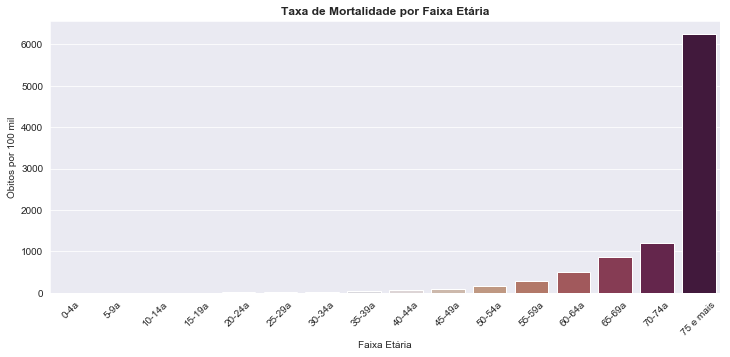

In [14]:
fig, axs = plt.subplots(figsize=(12, 5))
sb.barplot(data = cor_idade_melt[cor_idade_melt['Cor'] == 'Total'], x='Faixa Etária', 
            y='Óbitos por 100 mil', ax=axs, palette='twilight_shifted')
plt.xticks(rotation=45)
axs.set_facecolor = 'gray'
plt.title('Taxa de Mortalidade por Faixa Etária',fontweight="bold") 
plt.show()

Text(0, 0.5, 'Óbitos por cor por 100 mil habitantes')

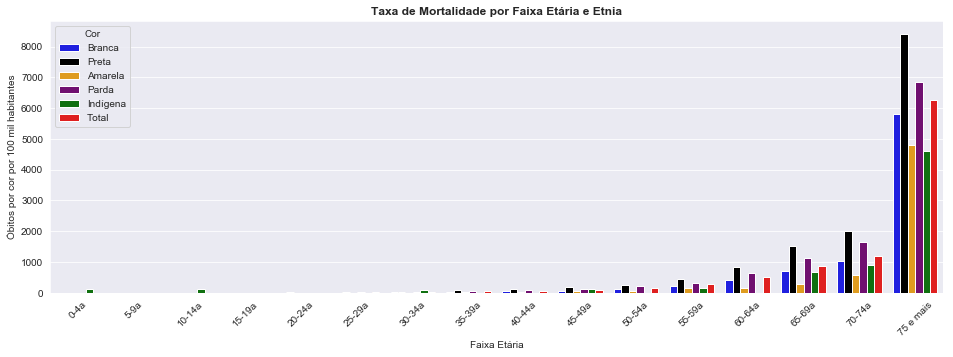

In [15]:
colors = ['blue', 'black', 'orange', 'purple', 'green','red']
fig, axs = plt.subplots(figsize=(16, 5))
sb.barplot(data = cor_idade_melt, x='Faixa Etária', hue='Cor', 
            y='Óbitos por 100 mil', ax=axs, palette=sb.color_palette(colors) )
plt.xticks(rotation=45) 
plt.title('Taxa de Mortalidade por Faixa Etária e Etnia',fontweight="bold") 
plt.ylabel('Óbitos por cor por 100 mil habitantes')

## 5 - Exportando o dataset

In [16]:
cor_idade_melt.to_csv('cor-idade-melt-tratado.csv')